In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* id 고유 id
* hour 시간
* temperature 기온
* precipitation 비가 오지 않았으면 0, 비가 오면 1
* windspeed 풍속(평균)
* humidity 습도
* visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone 오존
* pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count 시간에 따른 따릉이 대여 수


[대회링크](https://dacon.io/competitions/open/235576/data)

*  평가 산식 : RMSE

In [270]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/머신러닝 수업/따릉이/train.csv')
test = pd.read_csv('/content/drive/MyDrive/머신러닝 수업/따릉이/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/머신러닝 수업/따릉이/submission.csv')

## 데이터 둘러보기


In [165]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [166]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [167]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [168]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [169]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [170]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [171]:
train.shape, test.shape

((1459, 11), (715, 10))

## 시각화

In [271]:
# id값 처리
train = train.drop('id',axis=1)
test_id = test.pop('id')


In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1457 non-null   float64
 2   hour_bef_precipitation  1457 non-null   float64
 3   hour_bef_windspeed      1450 non-null   float64
 4   hour_bef_humidity       1457 non-null   float64
 5   hour_bef_visibility     1457 non-null   float64
 6   hour_bef_ozone          1383 non-null   float64
 7   hour_bef_pm10           1369 non-null   float64
 8   hour_bef_pm2.5          1342 non-null   float64
 9   count                   1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 114.1 KB


In [189]:
train_copy = train.copy()

In [ ]:
df = train_copy[['hour_bef_precipitation','count']]
train_copy = train_copy.drop(['count','hour_bef_precipitation'],axis=1)

In [191]:
# train_copy = train_copy.drop('hour_bef_precipitation',axis=1)

In [175]:
# 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
train_copy.head()

,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.5,89.0,576.0,0.027,76.0,33.0
1,13,20.1,1.4,48.0,916.0,0.042,73.0,40.0
2,6,13.9,0.7,79.0,1382.0,0.033,32.0,19.0
3,23,8.1,2.7,54.0,946.0,0.040,75.0,64.0
4,18,29.5,4.8,7.0,2000.0,0.057,27.0,11.0


박스플롯

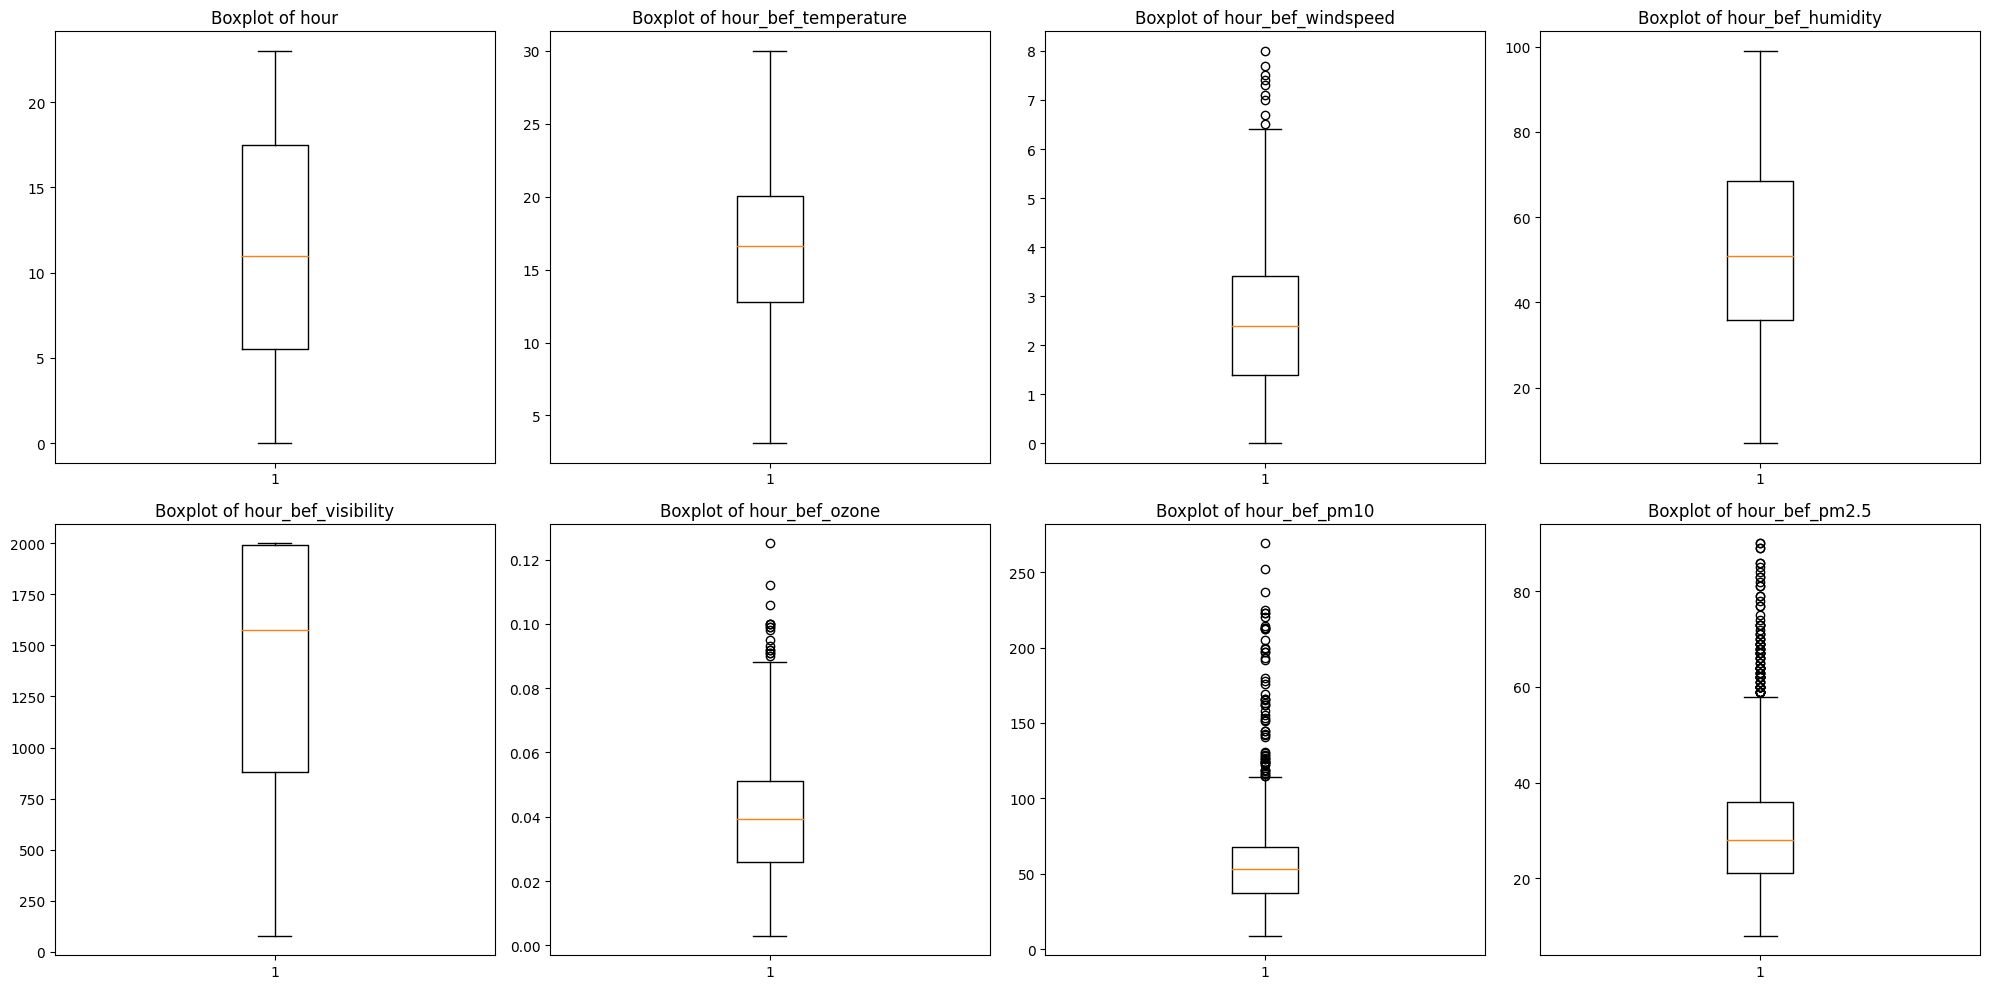

In [192]:
# 결측 치 처리후 실행
# Subplot을 위한 figure와 axes 객체 생성
plt.figure(figsize=(20, 10))

# 각 컬럼에 대한 박스플롯 생성
for i, col in enumerate(train_copy.columns):
    plt.subplot(2,4, i + 1)
    plt.boxplot(train_copy[col])
    plt.title(f'Boxplot of {col}')
    # plt.set_xlabel('Column')
    # plt.set_ylabel('Value')

# 그래프 간 간격 자동 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

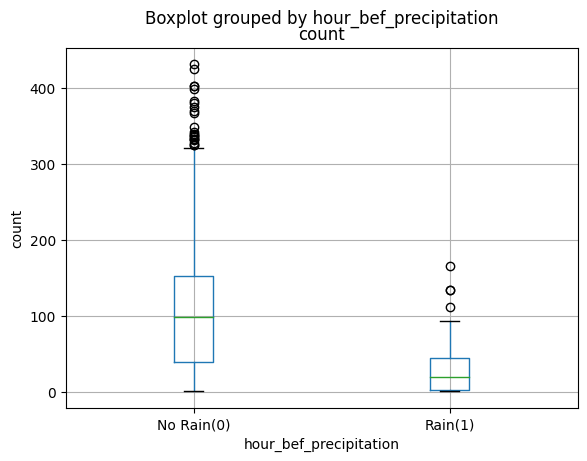

In [178]:
df['hour_bef_precipitation'] = df['hour_bef_precipitation'].map({0.0:'No Rain(0)',1.0:'Rain(1)'})
y = "hour_bef_precipitation"
var = "count"
df.boxplot(column=var,by = y)
plt.ylabel(var)
plt.xlabel(y)
plt.show();

히트맵

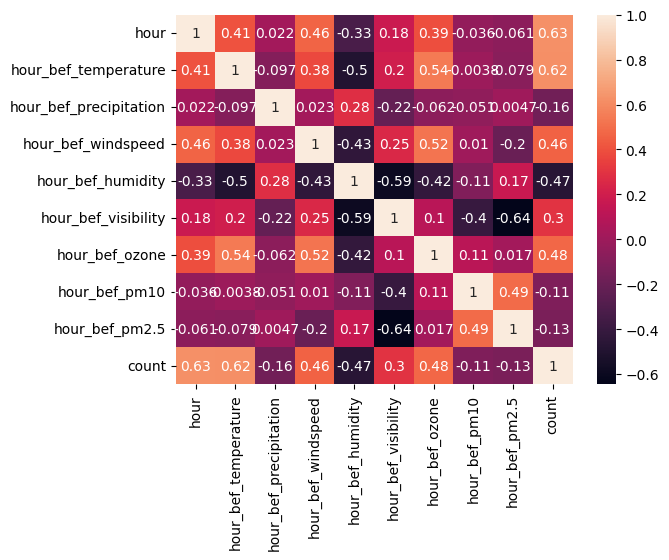

In [179]:
corr = train.corr()
sns.heatmap(corr,annot=True);

히스토그램

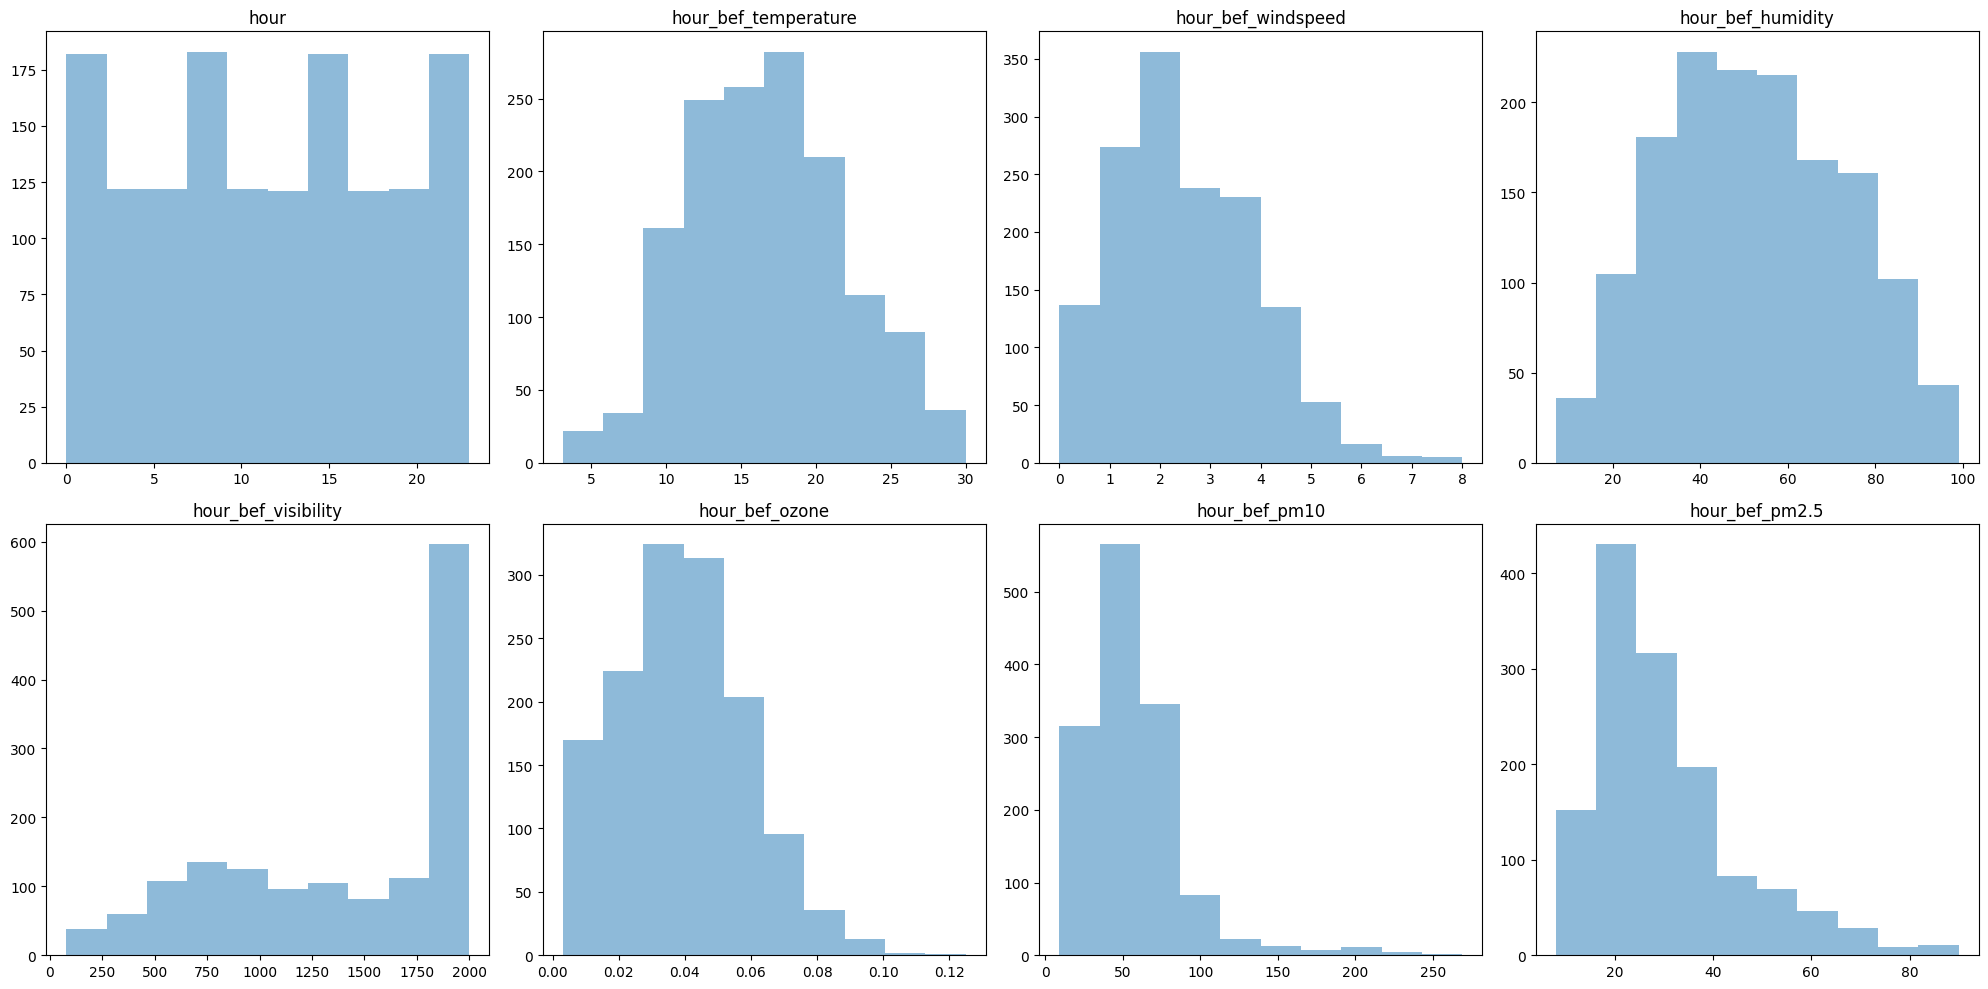

In [180]:
# Subplot을 위한 figure와 axes 객체 생성
plt.figure(figsize=(20, 10))

# 각 컬럼에 대한 박스플롯 생성
for i, col in enumerate(train_copy.columns):
    plt.subplot(2,4, i + 1)
    plt.hist(train_copy[col],bins=10, alpha=0.5);
    plt.title(col)

# 그래프 간 간격 자동 조정
plt.tight_layout();

# 그래프 보여주기
plt.show();

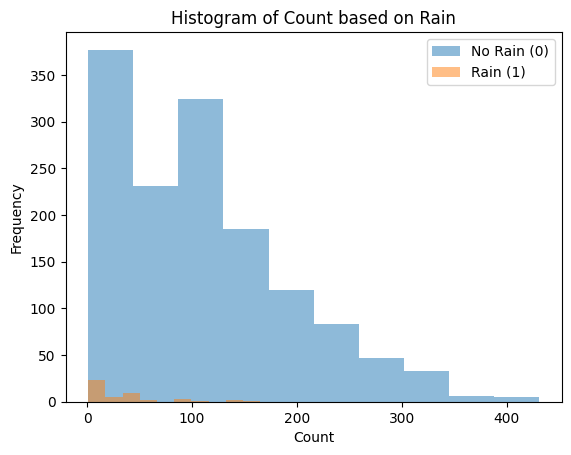

In [181]:
# hour_bef_precipitation이 0인 데이터와 1인 데이터를 분리

rain_0 = [df['count'][i] for i in range(len(df['count'])) if df['hour_bef_precipitation'][i] == 'No Rain(0)']
rain_1 = [df['count'][i] for i in range(len(df['count'])) if df['hour_bef_precipitation'][i] == 'Rain(1)']

# 히스토그램 그리기
plt.hist(rain_0, bins=10, alpha=0.5, label='No Rain (0)')
plt.hist(rain_1, bins=10, alpha=0.5, label='Rain (1)')

plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Count based on Rain')
plt.legend()
plt.show()

## 전처리

target 값

In [272]:
target = train.pop('count')

**결측값처리**

In [273]:
train.isnull().sum()

,0
hour,0
hour_bef_temperature,2
hour_bef_precipitation,2
hour_bef_windspeed,9
hour_bef_humidity,2
hour_bef_visibility,2
hour_bef_ozone,76
hour_bef_pm10,90
hour_bef_pm2.5,117


In [274]:
test.isnull().sum()

,0
hour,0
hour_bef_temperature,1
hour_bef_precipitation,1
hour_bef_windspeed,1
hour_bef_humidity,1
hour_bef_visibility,1
hour_bef_ozone,35
hour_bef_pm10,37
hour_bef_pm2.5,36


**Iterative Imputer**

데이터 전처리 과정에서 Iterative Imputer를 사용하면, 결측값이 있는 데이터를 효율적으로 처리할 수 있습니다. Iterative Imputer는 피처 간의 상관관계를 활용하여 결측값을 예측하므로, 특히 피처 간 상관관계가 높은 데이터셋에서 유용합니다.

 **Iterative Imputer의 장점**

* 더 나은 예측 성능: 피처들 간의 상관관계를 고려하여 결측값을 예측하기 때문에 단순한 평균이나 중앙값 대체보다 더 정확한 값을 제공할 수 있습니다.
* 다양한 모델 사용 가능: BayesianRidge 외에도 결정 트리, 랜덤 포레스트 등 다양한 회귀 모델을 사용할 수 있어 데이터 특성에 맞춘 유연한 결측값 처리 가능.
* 다중 대체 가능성: 반복적 과정에서 여러 번의 예측값을 생성하므로, 다중 대체 방식으로 불확실성을 고려한 분석이 가능합니다.

**Iterative Imputer의 단점**

* 계산 비용: 반복적으로 모델을 학습하고 예측해야 하므로, 대규모 데이터셋에서는 시간이 많이 소요될 수 있습니다.
* 복잡성: 알고리즘이 단순한 대체법보다 복잡하기 때문에 이해하고 설정하는 데 더 많은 노력이 필요합니다.
* 모델 편향: 잘못된 모델을 선택하면 결측치 대체가 잘못될 수 있습니다. 따라서 데이터에 적합한 모델을 선택하는 것이 중요합니다.

In [275]:
# 결측값 처리
from sklearn.experimental import enable_iterative_imputer  # IterativeImputer를 사용하기 위해 필요
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
for col in train.columns:
    train[col] = imputer.fit_transform(train[[col]])
    test[col] = imputer.transform(test[[col]])

In [276]:
train.isnull().sum()

,0
hour,0
hour_bef_temperature,0
hour_bef_precipitation,0
hour_bef_windspeed,0
hour_bef_humidity,0
hour_bef_visibility,0
hour_bef_ozone,0
hour_bef_pm10,0
hour_bef_pm2.5,0


In [277]:
test.isnull().sum()

,0
hour,0
hour_bef_temperature,0
hour_bef_precipitation,0
hour_bef_windspeed,0
hour_bef_humidity,0
hour_bef_visibility,0
hour_bef_ozone,0
hour_bef_pm10,0
hour_bef_pm2.5,0


hour_bef_visibility 컬럼은 왜도 가 매우 높은 관계로 삭제

In [278]:
train = train.drop('hour_bef_visibility',axis=1)

In [279]:
test = test.drop('hour_bef_visibility',axis=1)

In [280]:
# StandatdScaler
cols = ['hour_bef_ozone','hour_bef_windspeed','hour_bef_pm10','hour_bef_pm2.5']
from sklearn.preprocessing import StandardScaler
for col in cols:
    scaler = StandardScaler()
    train[col] = scaler.fit_transform(train[[col]])
    test[col] = scaler.transform(test[[col]])

In [149]:
# train = train.drop('hour_bef_pm2.5',axis=1)

In [243]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [216]:
# StandatdScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [281]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(train, target, test_size=0.2, random_state=110)
x_tr.shape,x_val.shape,y_tr.shape,y_val.shape

((1167, 8), (292, 8), (1167,), (292,))

## 모델 예측및 평가

In [282]:
# 평가 라이브러리 및 함수
from sklearn.metrics import mean_squared_error
def rmse(y_val,pred):
    return mean_squared_error(y_val,pred)**0.5

In [283]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr,y_tr)
pred = lr.predict(x_val)

print(rmse(y_val, pred))


51.290478360934536


In [284]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_tr,y_tr)
pred = log.predict(x_val)


# 평가
print(rmse(y_val, pred))

74.31919311828825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [285]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=2023)
rf.fit(x_tr,y_tr)
pred = rf.predict(x_val)

print(rmse(y_val, pred))

37.867117917514825


In [286]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(x_tr,y_tr)
pred = lgbm.predict(x_val)

print(rmse(y_val, pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 1167, number of used features: 8
[LightGBM] [Info] Start training from score 107.768638
38.30978909847225


In [287]:
!pip install xgboost

In [288]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_tr,y_tr)
pred = xgb.predict(x_val)

print(rmse(y_val, pred))

41.300319738145035


In [289]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer

# rmse_scorer = make_scorer(rmse, greater_is_better=False)

# # RandomForest 회귀 모델
# # 랜덤 포레스트 회귀 모델 정의
# model = RandomForestRegressor(random_state=2023)

# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [50,100, 200, 300],
#     'max_depth': [None, 3,6,9,15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 6, 8],
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=rmse_scorer, cv=5, n_jobs=-1, verbose=2)

# # 데이터로 GridSearchCV 실행
# grid_search.fit(x_tr,y_tr)

# # 최적의 파라미터와 성능 확인
# print("최적의 파라미터:", grid_search.best_params_)
# print("최적의 RMSE:", (-grid_search.best_score_))

In [290]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300,
                           min_samples_leaf = 1,
                           min_samples_split=2,
                           max_depth=15,
                           bootstrap = True,
                           random_state=2023)
rf.fit(x_tr,y_tr)
pred = rf.predict(x_val)

print(rmse(y_val, pred))

37.537932711463654


In [291]:
# import numpy as np
# from lightgbm import LGBMRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, mean_squared_error

# # RMSE를 정의하고 make_scorer로 변환
# def rmse(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# rmse_scorer = make_scorer(rmse, greater_is_better=False)

# # LightGBM 회귀 모델 정의
# model = LGBMRegressor(random_state=42)

# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'max_depth': [-1, 5, 10, 15, 20],
#     'num_leaves': [20, 31, 40, 50, 60],
#     'min_child_samples': [5, 10, 20, 30, 40],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
# }

# # GridSearchCV 설정
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=rmse_scorer, cv=5, n_jobs=-1, verbose=2)

# # 데이터로 GridSearchCV 실행
# grid_search.fit(x_tr, y_tr)

# # 최적의 파라미터와 성능 확인
# print("최적의 파라미터:", grid_search.best_params_)
# print("최적의 RMSE:", -grid_search.best_score_)

In [292]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(x_tr,y_tr)

pred = gb.predict(x_val)
print(rmse(y_val, pred))

38.886772229378764


In [293]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=50, random_state=110)
ada.fit(x_tr,y_tr)

pred = ada.predict(x_val)
print(rmse(y_val, pred))

54.2023971852362


In [294]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_impurity_decrease=0.0)
dtc.fit(x_tr, y_tr)
pred = dtc.predict(x_val)
print(rmse(y_val, pred))

46.04511264734401


In [295]:
# Bagging
from sklearn.ensemble import BaggingRegressor
base_model = DecisionTreeRegressor()
bag = BaggingRegressor(estimator=base_model,
                          n_estimators=300,
                          bootstrap=True,
                          n_jobs=-1,
                          random_state=110)
bag.fit(x_tr,y_tr)
pred = bag.predict(x_val)
print(rmse(y_val, pred))

37.92425618458098
